In [1]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:08<00:00, 126MB/s]
100% 812M/812M [00:08<00:00, 95.2MB/s]


In [10]:
from zipfile import ZipFile
data=('/content/dogs-vs-cats.zip')
with ZipFile(data,'r') as zip:
  zip.extractall()
  

In [11]:
from zipfile import ZipFile
dataset=('/content/train.zip')
with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [12]:
import os
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
file_count

25000

In [ ]:
file_names=os.listdir('/content/train')
file_names

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

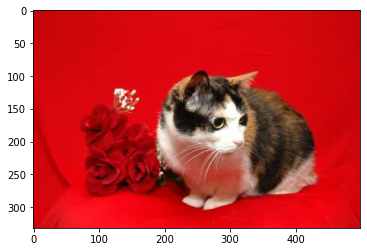

In [32]:
img=mpimg.imread('/content/train/cat.777.jpg')
plt.imshow(img)


In [34]:
c,d=0,0
for img in file_names:
  name=img[0:3]
  if name=='dog':
    d=d+1
  else:
    c=c+1
c,d

(12500, 12500)

In [38]:
# resizing
folder='/content/train/'
resized='/content/resize/'
for i in range(3000):
  filename=os.listdir(folder)[i]
  img_path=folder+filename
  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert('RGB')
  newpath=resized+filename
  img.save(newpath)


In [45]:
# label creation
labels=[]
f=os.listdir('/content/resize/')
for i in range(3000):
  label=f[i][0:3]
  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)

In [49]:
# numpy arrays
import cv2
import glob

In [50]:
img_directory='/content/resize/'
img_extension=['png','jpg']
files=[]
[files.extend(glob.glob(img_directory+'*.'+e)) for e in img_extension]
dog_cat_img=np.asarray([cv2.imread(f) for f in files])

In [52]:
# finally training
X=dog_cat_img
y=np.asarray(labels)

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [54]:
X_train=X_train/255
X_test=X_test/255

In [55]:
import tensorflow as tf
import tensorflow_hub as hub


In [56]:
model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [57]:
mymodel=hub.KerasLayer(model,input_shape=(224,224,3),trainable=False)


In [59]:
classes=2
modell=tf.keras.Sequential([
    mymodel,
    tf.keras.layers.Dense(classes)
])
modell.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [61]:
modell.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [64]:
modell.fit(X_train,y_train,epochs=7)

Epoch 1/7
75/75 [==============================] - 62s 765ms/step - loss: 0.1203 - accuracy: 0.9604
Epoch 2/7
75/75 [==============================] - 57s 764ms/step - loss: 0.0519 - accuracy: 0.9825
Epoch 3/7
75/75 [==============================] - 57s 766ms/step - loss: 0.0381 - accuracy: 0.9887
Epoch 4/7
75/75 [==============================] - 56s 746ms/step - loss: 0.0329 - accuracy: 0.9921
Epoch 5/7
75/75 [==============================] - 56s 742ms/step - loss: 0.0259 - accuracy: 0.9921
Epoch 6/7
75/75 [==============================] - 60s 799ms/step - loss: 0.0219 - accuracy: 0.9954
Epoch 7/7
75/75 [==============================] - 58s 769ms/step - loss: 0.0174 - accuracy: 0.9958
